# **Spam Detection using Naive Bayes**

###### **Mount Google Drive**

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### **Import Required Libraries**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

###### **Load the Dataset**

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/spam.csv")

In [57]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###### **Convert Target Labels to Numeric**

In [58]:
df["Spam"] = df["Category"].apply(lambda x : 1 if x =="spam" else 0 )

In [59]:
df.drop(columns=["Category"],inplace=True)

In [60]:
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


###### **Split Features and Target**

In [61]:
X = df[["Message"]]
y = df["Spam"]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
X_train

,Message
3890,Unlimited texts. Limited minutes.
5553,Hahaha..use your brain dear
4366,Ujhhhhhhh computer shipped out with address to...
3968,YOU HAVE WON! As a valued Vodafone customer ou...
3771,Love it! The girls at the office may wonder wh...
...,...
3335,"That's fine, have him give me a call if he kno..."
1099,NO GIFTS!! You trying to get me to throw mysel...
2514,U have won a nokia 6230 plus a free digital ca...
3606,Jordan got voted out last nite!


###### **Text Vectorization**

In [67]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train["Message"])
X_test_vectorized = vectorizer.transform(X_test["Message"])

In [68]:
print(X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
print(X_test_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###### **Train Naive Bayes Model**

In [70]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

###### **Make Predictions**

In [71]:
y_predicted = model.predict(X_test_vectorized)

###### **Model Accuracy**

In [73]:
model.score(X_test_vectorized, y_test)

0.9739910313901345

###### **Confusion Matrix**

In [76]:
cm = confusion_matrix(y_test,y_predicted)

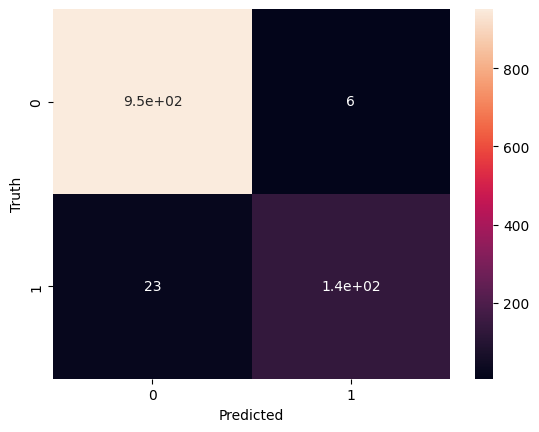

In [79]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()